# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 While doing this project I was able to takeaway 2 conclusions:
 1. The two most used drugs on males and female mice are Capomulin and Ramicane.
 2. While looking at the line graph and the capomulin treatment, as the timepoint days go by the tumor level decrease.   
 3. There are more male than females mice. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_dataframe = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
mouse_dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mice_count = mouse_dataframe["Mouse ID"].unique()
len(mice_count)

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dataframe.loc[mouse_dataframe.duplicated(["Mouse ID", "Timepoint"]),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dataframe.loc[mouse_dataframe["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_dataframe_clean = mouse_dataframe.copy()
mouse_dataframe_clean = mouse_dataframe_clean.loc[~(mouse_dataframe_clean["Mouse ID"] == "g989")]


In [10]:
# Checking the number of mice in the clean DataFrame.
len(mouse_dataframe_clean["Mouse ID"].unique())

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = mouse_dataframe_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume = mouse_dataframe_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor_volume = mouse_dataframe_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdev_tumor_volume = mouse_dataframe_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sterr_tumor_volume = mouse_dataframe_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
stats_data = {"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, "Tumor Volume Variance": variance_tumor_volume, "Tumor Volume Std. Dev.": stdev_tumor_volume, "Tumor Volume Std. Err.":sterr_tumor_volume}

stats_df = pd.DataFrame(stats_data)
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggreg_stats = mouse_dataframe_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(['mean','median', 'var','std', 'sem'])
aggreg_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Observed Mouse Timepoints'>

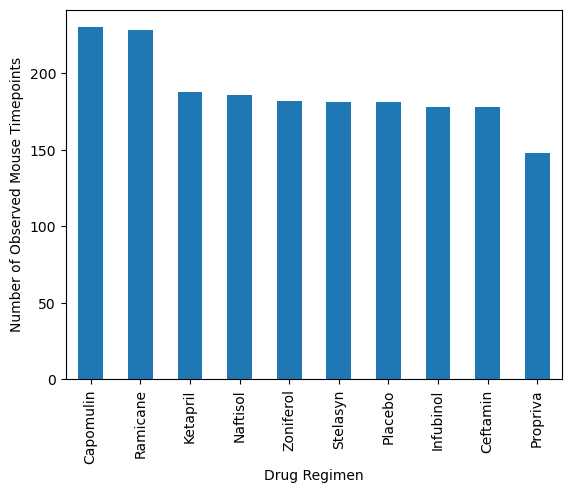

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bargraph_data = mouse_dataframe_clean["Drug Regimen"].value_counts()
bargraph_data = bargraph_data.plot(kind="bar", xlabel = "Drug Regimen", ylabel = "Number of Observed Mouse Timepoints")
bargraph_data

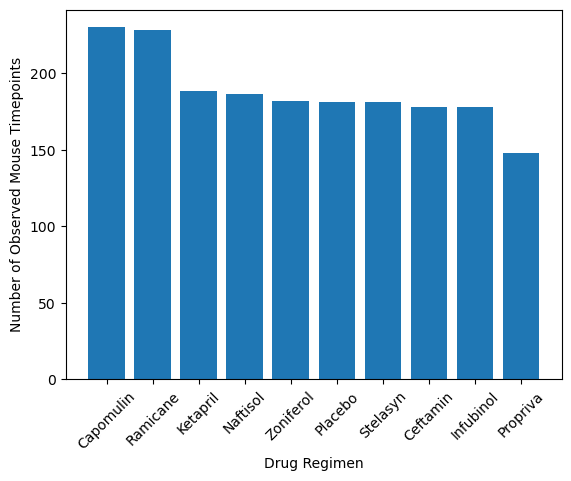

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bargraph_data2 = mouse_dataframe_clean[["Mouse ID", "Timepoint", "Drug Regimen"]]
bargraph_data2 = bargraph_data2.groupby(["Drug Regimen"]).count().reset_index().sort_values(by="Mouse ID", ascending=False)
bargraph_data2

plt.bar(bargraph_data2["Drug Regimen"], bargraph_data2["Mouse ID"], align = "center")

plt.xlabel("Drug Regimen")
plt.xticks(rotation = 45)
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

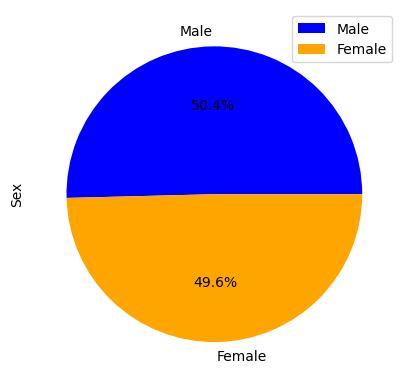

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = mouse_dataframe_clean[["Mouse ID", "Sex"]]
gender_data = gender_data.drop_duplicates().groupby(["Sex"]).count().sort_values(by="Mouse ID", ascending=False)
gender_data.rename (columns={"Mouse ID": "Count"}, inplace=True)
gender_data.plot(kind="pie", y = "Count", autopct= "%1.1f%%", colors = ["blue", "orange"], startangle = 0, ylabel = "Sex")
plt.show()

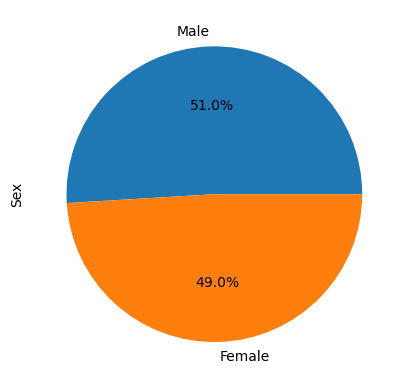

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels = ['Male', 'Female']
gender_values = mouse_dataframe_clean["Sex"].value_counts()
plt.pie(gender_values, labels=gender_labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = mouse_dataframe_clean.loc[mouse_dataframe_clean["Drug Regimen"]== "Capomulin"]
Ramicane_df = mouse_dataframe_clean.loc[mouse_dataframe_clean["Drug Regimen"]== "Ramicane"]
Infubinol_df = mouse_dataframe_clean.loc[mouse_dataframe_clean["Drug Regimen"]== "Infubinol"]
Ceftamin_df = mouse_dataframe_clean.loc[mouse_dataframe_clean["Drug Regimen"]== "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
Capo_last = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Rami_last = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Infu_last = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Ceft_last = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]

Capomulin_volume = pd.DataFrame(Capo_last)
Ramiscane_volume = pd.DataFrame(Rami_last)
Infubinol_volume = pd.DataFrame(Infu_last)
Ceftamin_volume = pd.DataFrame(Ceft_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge = Capomulin_volume.merge(mouse_dataframe_clean, on=("Mouse ID", "Timepoint"), how="left")
Ramiscane_merge = Ramiscane_volume.merge(mouse_dataframe_clean, on=("Mouse ID", "Timepoint"), how="left")
Infubinol_merge = Infubinol_volume.merge(mouse_dataframe_clean, on=("Mouse ID", "Timepoint"), how="left")
Ceftamin_merge = Ceftamin_volume.merge(mouse_dataframe_clean, on=("Mouse ID", "Timepoint"), how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


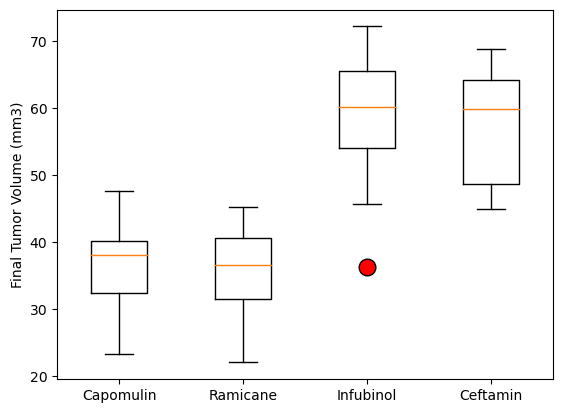

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

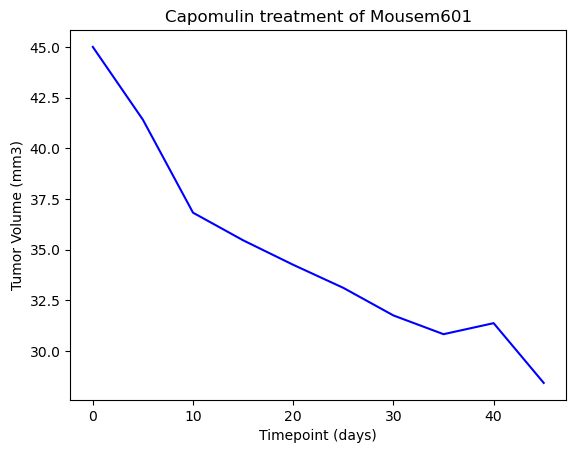

In [46]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
MouseID = "m601" 
capomulin_data = mouse_dataframe_clean.loc[mouse_dataframe_clean["Drug Regimen"]=="Capomulin", :]

per_mouse = capomulin_data.loc[capomulin_data["Mouse ID"]== MouseID, ["Timepoint", "Tumor Volume (mm3)"]].set_index("Timepoint")
per_mouse.plot(kind="line", color = "blue", xlabel = "Timepoint (days)", ylabel = "Tumor Volume (mm3)", legend = False, title = f"Capomulin treatment of Mouse" + MouseID)
plt.show()

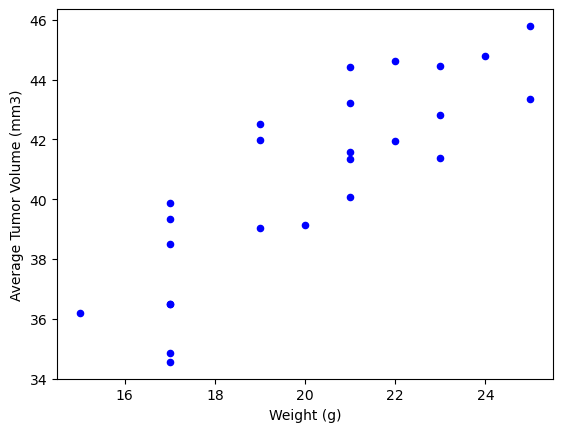

In [47]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_plot_graph = capomulin_data.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean().rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
weight_plot_graph.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", color = "blue")
plt.show()

## Correlation and Regression

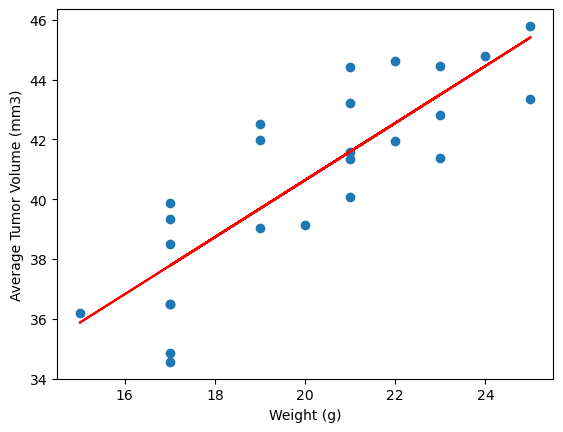

The correlation between mouse weight and the average tumor volume is 0.84


In [48]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

average_tumor_volume_df = capomulin_data.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean().rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
average_tumor_volume_df = average_tumor_volume_df.reset_index(drop=True)
average_tumor_volume_df

weight_plot = average_tumor_volume_df.loc[:, "Weight (g)" ]
average_tumor_volume_df_plot = average_tumor_volume_df.loc[:, "Average Tumor Volume (mm3)" ]

t_slope, t_int, t_r, t_p, t_std_err = st.linregress(weight_plot, average_tumor_volume_df_plot)
t_fit = t_slope * weight_plot + t_int
plt.scatter(weight_plot,average_tumor_volume_df_plot)
plt.plot(weight_plot,t_fit, 'r')
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {round(t_r, 2)}")